In [1]:
#from PyDBDdim.utils import DimensionlessLearning
import torch
torch.manual_seed(0)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

import sys
import matplotlib
#sys.path.append(r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new')
#import vics_fcns as vf


# we want to plot the performance of the dimensionless numbers. Using this notebook is easy, except for one detail.
It assumes that you have organized your folders the way I have: each rate it its own folder. Similarly, each lambda_gamma within a rate, in its own folder as well. The plotting code itsef is in vics_fcns.

Lambda tuning plots in the next cell. Rate tuning in the following cell.

#Lambda Tuning
For this cell, you can different lambda values for a given rate. This lets you see how your dimensionless number size and performance changes with lambda_gamma.

In the below, you provide the location of the different lambda_gamma folders. Each lambda_gamma folder should have a summary excel sheet.
The "data" dictionary collects the performance for different ways of slicing the data. You can take the top performer any number of ways. We did it by taking the top val (best performance on in-set data) and so we could observe how that related to the best extrapolation performance.

Then, you can plot. vf.plot_dict_vs_list will plot data from the data dictionary vs the lambda values. It will use titles that you provide.

number of val over threshold is [False  True False False  True False False  True False False False  True
 False  True  True  True False  True False False False False  True False]
number of val over threshold is [False  True False False  True False False  True  True False False  True
 False  True False  True False  True  True  True False  True False False
  True  True  True False]
number of val over threshold is [False  True False False  True  True False  True  True  True False  True
  True  True False  True  True  True  True  True  True  True False  True
 False  True  True False]
number of val over threshold is [False  True  True False  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True False  True False  True
  True  True  True False]
number of val over threshold is [False  True  True  True  True  True  True  True  True  True False  True
  True  True False  True  True  True  True  True  True  True False  True
  True  True  True False]
numbe

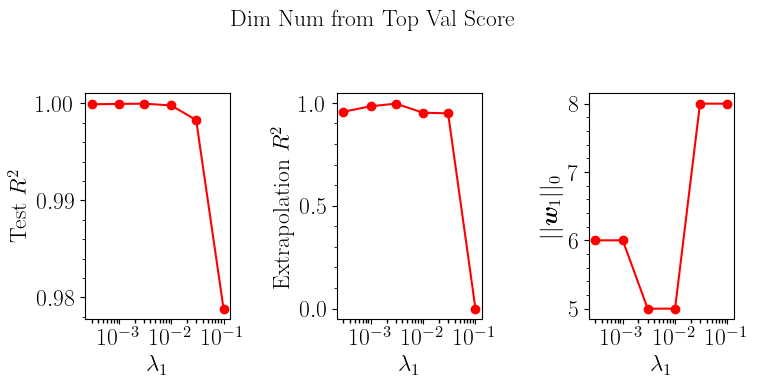

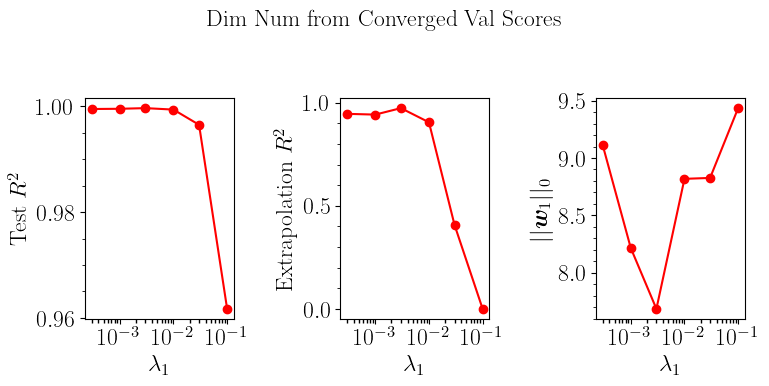

In [3]:
folder_path = r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new\dim_num_mb_val_test\packed\6_rates'
data = vf.process_excel_files(folder_path)


x_titles = [r"$\lambda_1$",r"$\lambda_1$", r"$\lambda_1$"]
y_titles = [r"$R^2$" , r"$R^2$", r"$||\boldsymbol{w}_{1}||_0$"]


#plot_dict_vs_list(data['top_test'], data['lambda'], y_titles, x_titles, r'Dim Num from Top Test Score')
fig_top_val = vf.plot_dict_vs_list(data['top_val'], data['lambda'], y_titles, x_titles, r'Dim Num from Top Val Score')
plt.savefig('mb_packed_top_val_lambda_tuning.png')

#plot_dict_vs_list(data['sub_top_val'], data['lambda'], y_titles, x_titles, r'Dim Num from Best Test of Top Val Scores')
#plot_dict_vs_list(data['top_5'], data['lambda'], y_titles, x_titles, r'Dim Num from Top 5 Val Score')
fig_converged = vf.plot_dict_vs_list(data['converged'], data['lambda'], y_titles, x_titles, r'Dim Num from Converged Val Scores')
plt.savefig('mb_packed_converged_lambda_tuning.png')

#plot_dict_vs_list(data['frac'], data['lambda'], ['hit rate', r"$|\boldsymbol{w}_{\Pi}|_0$"], [r"$\lambda_1$",r"$\lambda_1$"], r'Dim Num Where Val > 0.9, Test > 0.9'  )



This block: tell it precisely which excel summaries to use. vf.get_rate_tuning will then plot it. As before, you can specify how it plots the data.

best_r2 = results['top_val']['val_r2']

specifies that I want the validation score of the top performers on the validation set.

best_r2_card = results['top_val']['card_w']

speciefies that I want the dimensionless number size of the top performers on the validation set.

<Figure size 1500x900 with 0 Axes>

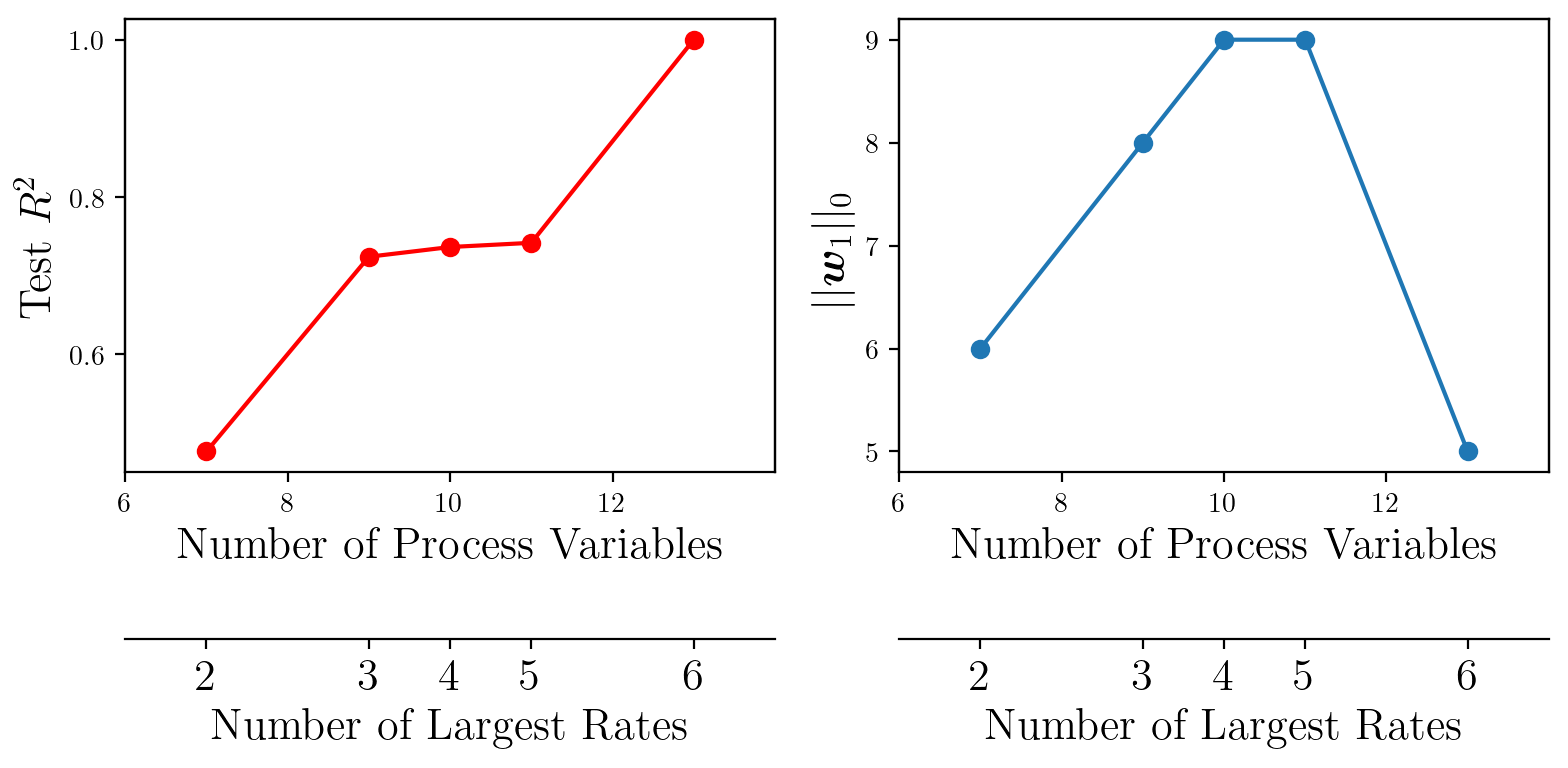

In [2]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sys.path.append(r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs_cleanup\He_code_new')
import vics_fcns as vf

# Define your font properties
font = {'family': 'Arial',
        'weight': 'bold',
        'size': 20}

sys.path.append("Users\vvmil\AppData\Local\Programs\MiKTeX")
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'
plt.figure(dpi=300, figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'





%matplotlib inline
%config InlineBackend.figure_format='retina'
data_dict = {
    '2': r"C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new\dim_num_mb_val_test\packed\2_rates\summary_recheck.xlsx",
    '3': r"C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new\dim_num_mb_val_test\packed\3_rates\summary_recheck.xlsx",
    '4': r"C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new\dim_num_mb_val_test\packed\4_rates\summary_recheck.xlsx",
    '5': r"C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new\dim_num_mb_val_test\packed\5_rates\summary_recheck.xlsx",
    '6': r"C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new\dim_num_mb_val_test\packed\6_rates\lambda_0.003\summary.xlsx",
            }

rates, results = vf.get_rate_tuning(data_dict)
terms = [7,9,10,11,13] #must be extracted manually rn


best_r2 = results['top_val']['val_r2']
test_r2 = results['top_val']['test_r2']
best_r2_card = results['top_val']['card_w']
my_fig = vf.multi_axes_plot(rates, terms, best_r2, best_r2_card)
plt.savefig('mb_packed_lambda_003_best_val_rate_tuning_no_18.png')

